Business understanding
problem statement
data understanding

To perform data exploration, preprocessing, and predictive modeling, you will need to import several libraries in Python. Here are the necessary libraries:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer


### Loading the dataset

In [18]:
# Importing the csv files
training_set_values = pd.read_csv("training_set_values.csv")
test_set_values = pd.read_csv("test_set_values.csv")
training_set_labels = pd.read_csv("training_set_labels.csv")



### Data Exploration.

In [19]:
# Explore the structure of training_set_values
print(training_set_values.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [22]:
# Explore the first few rows of the dataset
print(training_set_values.head())

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    14/03/2011         Roman        1390         Roman   
1   8776         0.0    06/03/2013       Grumeti        1399       GRUMETI   
2  34310        25.0    25/02/2013  Lottery Club         686  World vision   
3  67743         0.0    28/01/2013        Unicef         263        UNICEF   
4  19728         0.0    13/07/2011   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quant

In [23]:
# Summary statistics of numerical features
print(training_set_values.describe())

                 id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.00

In [24]:
# Summary statistics of categorical features
print(training_set_values.describe(include=['object']))


       date_recorded                  funder installer wpt_name  \
count          59400                   55765     55745    59400   
unique           356                    1897      2145    37400   
top       15/03/2011  Government Of Tanzania       DWE     none   
freq             572                    9084     17402     3563   

                basin subvillage  region     lga   ward public_meeting  ...  \
count           59400      59029   59400   59400  59400          56066  ...   
unique              9      19287      21     125   2092              2  ...   
top     Lake Victoria   Madukani  Iringa  Njombe  Igosi           True  ...   
freq            10248        508    5294    2503    307          51011  ...   

       payment_type water_quality quality_group quantity quantity_group  \
count         59400         59400         59400    59400          59400   
unique            7             8             6        5              5   
top       never pay          soft          

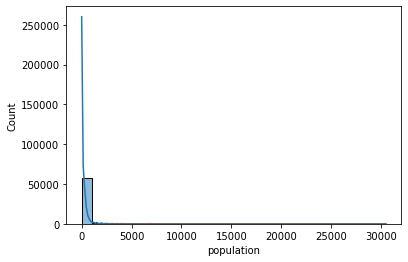

In [25]:
# Visualize distributions of numerical features
sns.histplot(data=training_set_values['population'], bins=30, kde=True)
plt.show()


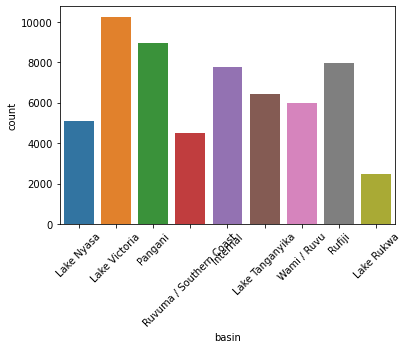

In [26]:
# Visualize distributions of categorical features
sns.countplot(data=training_set_values, x='basin')
plt.xticks(rotation=45)
plt.show()
